In [1]:
#################### Nonlinear Regression ####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#################### Hyperparameters
train_rate = 0.7
val_rate = 0.1
test_rate = 0.2
epoch = 300
etta = 0.01
d = 2


#################### Loading Dataset and Preprocessing
df = pd.read_csv("data/auto-mpg.csv")
#df = df[['horsepower','mpg']]
x = np.mean(df[['horsepower']])
df[['horsepower']] = df[['horsepower']].fillna(x)

data = np.array(df[['horsepower','mpg']])

M, N = np.shape(data)
N = N - 1


def standardisation(data):
    out = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return out

def normalisation(data):
    M = np.max(data, axis=0)
    m = np.min(data, axis=0)
    out = (data - m) / (M - m)
    return out


data = standardisation(data)
X_data = np.reshape(data[:, 0], (M,N))
Y_data = np.reshape(data[:, 1], (M,1))
x = np.reshape(X_data,(M,1))

for i in range(d+1):
    new_col = x**i
    if i == 0 :
        X_data = np.hstack((new_col, X_data))
    elif i == 1:
        continue
    else:
        X_data = np.hstack((X_data, new_col))
        

data = np.hstack((X_data, Y_data))


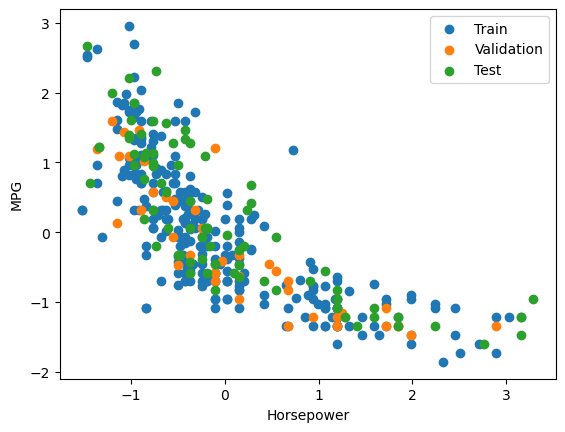

In [2]:
#################### Train-Test-Validation Split
M_train = int(np.ceil(train_rate * M))
M_val = int(np.ceil(val_rate * M))
M_test = M - (M_train + M_val)

idx = np.random.permutation(M)
train_idx = idx[:M_train]
val_idx = idx[M_train: M_train + M_val]
test_idx = idx[M_train + M_val:]

X_train = data[train_idx, :-1] 
Y_train = data[train_idx, -1]
X_val = data[val_idx, :-1]
Y_val = data[val_idx, -1]
X_test = data[test_idx, :-1]
Y_test = data[test_idx, -1]



plt.scatter(X_train[:, 1], Y_train, label='Train')
plt.scatter(X_val[:, 1], Y_val, label='Validation')
plt.scatter(X_test[:, 1], Y_test, label='Test')
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.show()


In [3]:
#################### Nonlinear Regression Model

def MSE(Y, Y_hat, n):
    error = (1/n) * (Y - Y_hat)**2
    out = np.sum(error) 
    return out


def RMSE(Y, Y_hat, n):
    error = (1/n) * (Y - Y_hat)**2
    out = np.sum(error) 
    return np.sqrt(out)


def MAE(Y, Y_hat, n):
    error = (1/n) * np.abs(Y - Y_hat)
    out = np.sum(error)
    return out


def grad(X, Y, Y_hat, n):
    grad = (2/n) * (np.transpose(X) @ (Y_hat - Y))
    return grad



def R2(Y, Y_hat, n):
    s1 = np.sum((Y - Y_hat)**2)
    s2 = np.sum((Y - np.mean(Y_hat))**2)
    out = 1 - (s1/s2)
    return out


W = np.random.rand(d+1)
L_train = np.array([])
L_val = np.array([])

for i in range(epoch):
    Y_hat_train = X_train @ W
    Y_hat_val = X_val @ W
    c_train = MSE(Y_hat_train, Y_train, M_train)
    L_train = np.append(L_train, c_train)
    c_val = MSE(Y_hat_val, Y_val, M_val)
    L_val = np.append(L_val, c_val)
    
    W = W - (etta * grad(X_train, Y_train, Y_hat_train, M_train))



In [4]:
#################### Validation and Test
Y_hat_test = X_test @ W
MSE_train = L_train[-1]
MSE_val = L_val[-1]
MSE_test = MSE(Y_test, Y_hat_test, M_test)
r2_test = R2(Y_test, Y_hat_test, M_test)

print("The MSE of Train Is: ", MSE_train)
print("The MSE of Validation Is: ", MSE_val)
print("The MSE of Test Is: ", MSE_test)
print("The R2 of Test Is: ", r2_test)


The MSE of Train Is:  0.33707048248522875
The MSE of Validation Is:  0.17306851022566414
The MSE of Test Is:  0.33938012596142714
The R2 of Test Is:  0.6915951086660517


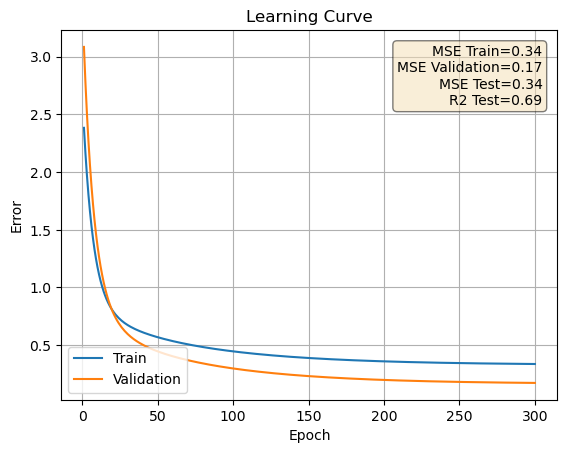

In [5]:
#################### Learning Curve
fig, ax = plt.subplots()
plt.plot(np.arange(1,epoch+1),L_train, label='Train')
plt.plot(np.arange(1, epoch+1), L_val, label='Validation')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend(loc="lower left")

txt = '\n'.join((
    r'MSE Train=%.2f' % (MSE_train, ),
    r'MSE Validation=%.2f' % (MSE_val, ),
    r'MSE Test=%.2f' % (MSE_test, ),
    r'R2 Test=%.2f' % (r2_test, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.97, 0.96, txt, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)



plt.show()

